In [7]:
pip install wordcloud

     |████████████████████████████████| 220 kB 1.9 MB/s eta 0:00:01
  Created wheel for wordcloud: filename=wordcloud-1.8.1-cp37-cp37m-macosx_10_9_x86_64.whl size=160324 sha256=a6c5a0c0b4cd10afc05dcc62249d521a3777c8f0f4b23fe3601e2d2b7ed9f2da
  Stored in directory: /Users/yashnaik12/Library/Caches/pip/wheels/f8/f6/55/6bd394c32a844a621ca0fe5dbf563c8d71d71edaf095656991
Successfully built wordcloud
Note: you may need to restart the kernel to use updated packages.


In [8]:
import numpy as np
import pandas as pd
import seaborn as sns
from wordcloud import WordCloud
import matplotlib.pyplot as plt

In [2]:
df=pd.read_excel("/Users/yashnaik12/Downloads/BBI+DataScience_Dec2020/MockSurveyData.xlsx")
df.head()

,case,Year,R.mth,date,intv_nam,Country_residence,City_residence,Purpose_grp,Purpose,Weights_QTR,...,tototh_$,totshopping_$,totexp_$,MainAccomm,MainHotel,travel_companion.1,travel_companion.2,travel_companion.3,travel_companion.4,travel_companion.5
0,18,2015,January,2015-01-01,Cindy Liu,Indonesia,Yogyakarta,Leisure,Holiday/ Rest & Relax,632.145161,...,0.0,854.853136,1096.186995,Hotel,V Hotel Lavender,Spouse,Children aged 8-12 yrs,NaN,NaN,NaN
1,41,2015,January,2015-01-01,Philip Chew,Indonesia,Batam,Leisure,Holiday/ Rest & Relax,341.937500,...,0.0,171.519802,379.309926,Hotel,Madras Hotel,Spouse,Children aged 0-7 yrs,Friends,NaN,NaN
2,43,2015,January,2015-01-01,Philip Chew,Indonesia,Batam,Leisure,Holiday/ Rest & Relax,432.866667,...,0.0,104.853136,420.727677,Hotel,Hotel 81 - Geylang,Spouse,Children aged 8-12 yrs,NaN,NaN,NaN
3,44,2015,January,2015-01-01,Philip Chew,Indonesia,Batam,Leisure,Others,368.285714,...,0.0,220.853136,378.990074,Accommodation not required - Others,NaN,Partner/ Boyfriend/ Girlfriend,Parents/ Parents-in-law,Siblings,NaN,NaN
4,45,2015,January,2015-01-01,Philip Chew,Indonesia,Batam,Others/ Refused,"Others - Personal (e.g. weddings, funerals, etc)",315.254902,...,0.0,104.853136,342.356298,Hotel,Hotel 81 - Bencoolen,Parents/ Parents-in-law,Siblings,NaN,NaN,NaN


In [3]:
df.shape

(8887, 48)

In [4]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 8887 entries, 0 to 8886
Data columns (total 48 columns):
 #   Column              Non-Null Count  Dtype         
---  ------              --------------  -----         
 0   case                8887 non-null   int64         
 1   Year                8887 non-null   int64         
 2   R.mth               8887 non-null   object        
 3   date                8887 non-null   datetime64[ns]
 4   intv_nam            8887 non-null   object        
 5   Country_residence   8887 non-null   object        
 6   City_residence      8887 non-null   object        
 7   Purpose_grp         8887 non-null   object        
 8   Purpose             8887 non-null   object        
 9   Weights_QTR         8887 non-null   float64       
 10  Air_Terminal        5697 non-null   object        
 11  Sea_Terminal        2828 non-null   object        
 12  Land_Terminal       355 non-null    object        
 13  langint             8887 non-null   object      

--> This data is all about Indonesian tourist who visited Singapore between 2014-2015.

- Dataset has 8887 datapoints (rows) with 48 features (columns).

- It contains the data from 2014 to 2015.

- All the visitors hail from Indonesia.

--> Key insights about tourists and answers some of the questions like :

• Most of the visitors come from which to visit Singapore ? 

• What are the profession of most of the visitors ?

• How much do they spend on food, clothing, shopping etc. ?

• Which hotel do the visitors prefer most ?

• How many days did they stay during their first visit and second visit ?

• How many people visited Singapore again after their first visit ?

• What is the difference in their choices while their first visit and second visit ?

• What kind of travel type do the visitors prefer in their first visit vs second visit ?

• What is the purpose of their visit to Singapore ?

• What mode of transportation is preferred by most of the visitors ?

• With whom visitors prefers to travel the most ? Who is their favorite companion ?

## INCREASE OR DECREASE IN THE COUNT OF VISITORS FROM 2014 - 2015

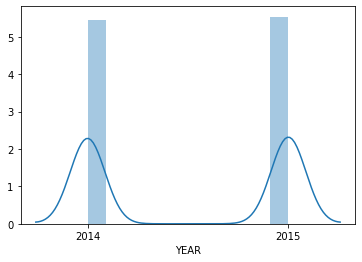

In [10]:
sns.distplot(df['Year'])
plt.xticks([2014, 2015])
plt.xlabel('YEAR')
plt.show()

- Almost same number of people visited in both the years.

- There is a slight increase in the number of visitors from 2014 – 2015 by 63.

- 2014 4412

- 2015 4475

## MONTHLY COUNT OF THE VISITORS

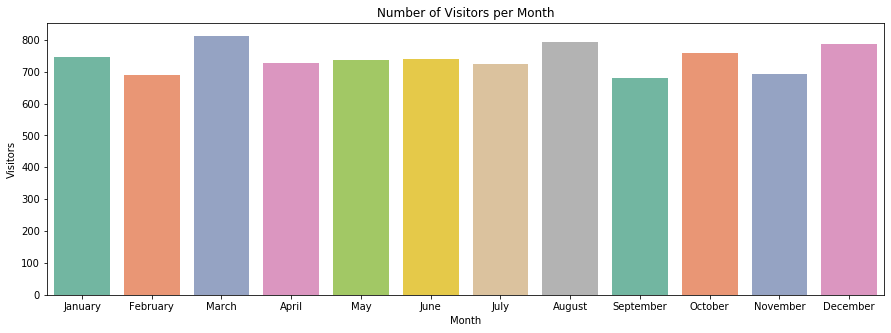

In [11]:
plt.figure(figsize=(15,5))
sns.countplot(df['R.mth'], palette='Set2')
plt.xlabel('Month')
plt.ylabel('Visitors')
plt.title('Number of Visitors per Month')
plt.show()

## CITY RESIDENCE OF THE VISITORS

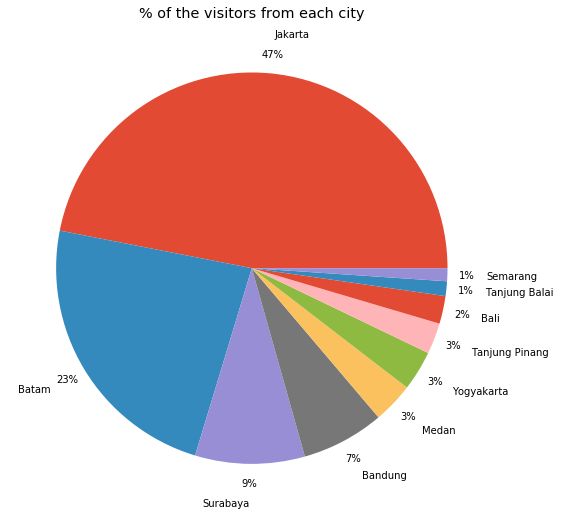

In [12]:
city = pd.DataFrame(df['City_residence'].value_counts())[:10]
city_names = city.index
count = city['City_residence']

plt.style.use('ggplot')
plt.figure(figsize=(9,9))
plt.rc('font', size=10)
plt.pie(count, autopct='%1.0f%%', labels = city_names, pctdistance=1.1, labeldistance=1.2)
plt.title('% of the visitors from each city')
plt.show()

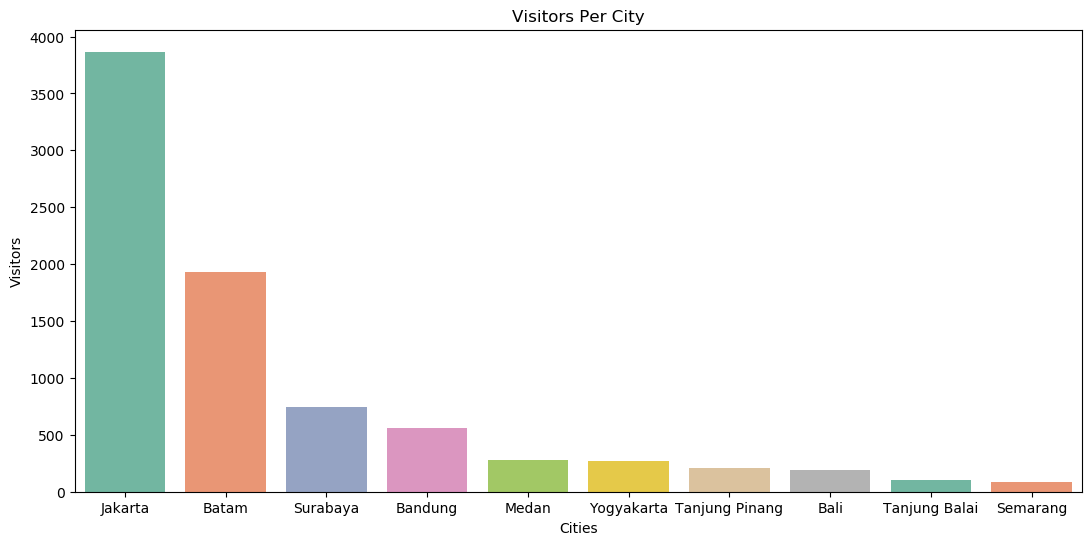

In [13]:
x = pd.DataFrame(df['City_residence'].value_counts()[:10]).index.tolist()
y = pd.DataFrame(df['City_residence'].value_counts()[:10])['City_residence'].tolist()
plt.style.use('default')
plt.figure(figsize=(13,6))
sns.barplot(x=x, y=y, palette='Set2')
plt.xlabel('Cities')
plt.ylabel('Visitors')
plt.title('Visitors Per City')
plt.show()

- Most of the visitors come from Jakarta and Batam

- 47% from Jakarta

- 23 % from Batam

- 9% from Surabhaya

- 7% from Bandung and rest from other cities.

## PURPOSE OF VISITING

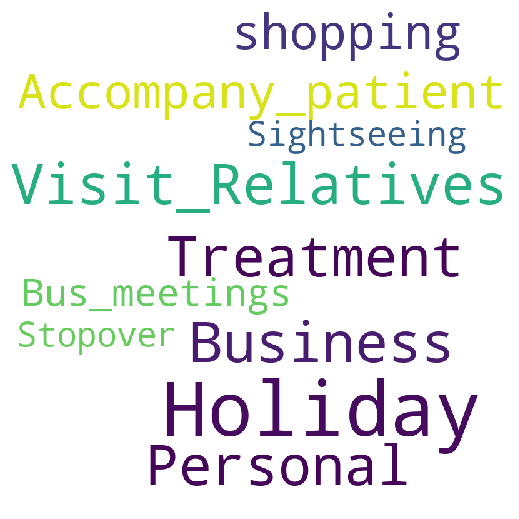

In [14]:
# top 10 purposes
ind_list = ['Holiday', 'Visit_Relatives', 'Business','Treatment','Personal', 'Accompany_patient','shopping','Bus_meetings', 'Sightseeing','Stopover']
d = dict()
for i, ind in enumerate(pd.DataFrame(df['Purpose'].value_counts()[:10]).index.tolist()):
    d[ind] = ind_list[i]

wordcloud = WordCloud(width = 800, height = 800, background_color ='white', min_font_size = 2).generate(' '.join(i for i in ind_list)) 
# plot the WordCloud image                        
plt.figure(figsize = (5, 5), facecolor = None) 
plt.imshow(wordcloud) 
plt.axis("off") 
plt.tight_layout(pad = 0) 
plt.show()

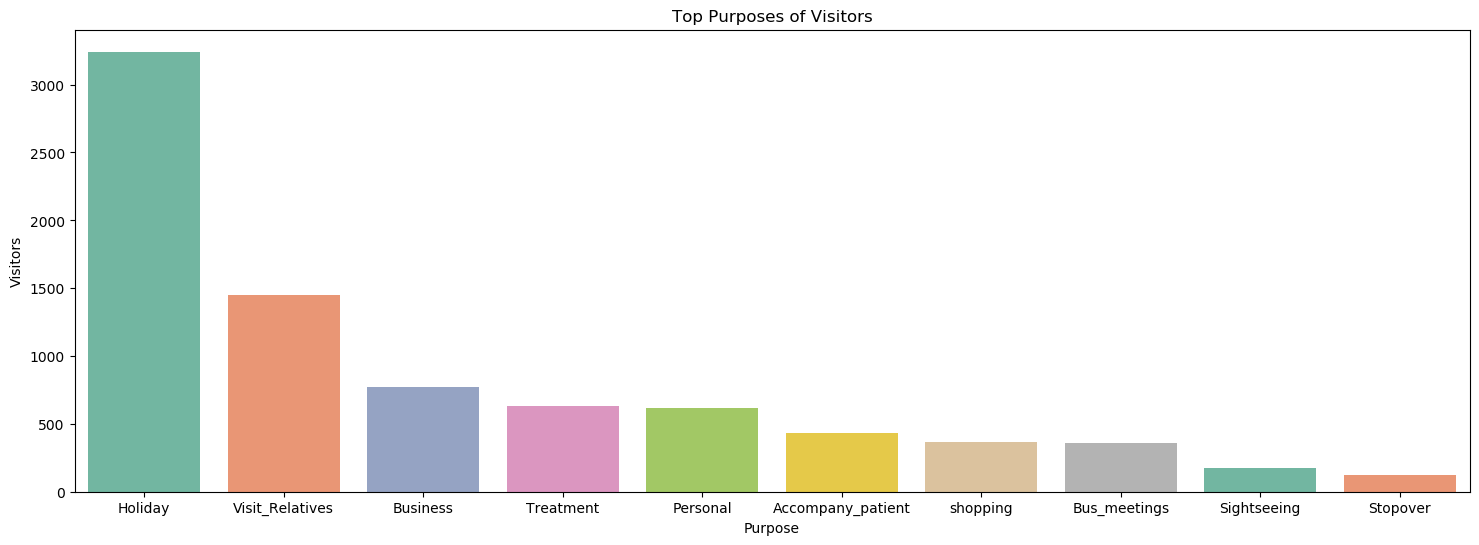

In [15]:
x = pd.DataFrame(df['Purpose'].value_counts()[:10]).rename(index=d).index.tolist()
y = pd.DataFrame(df['Purpose'].value_counts()[:10])['Purpose'].tolist()

plt.figure(figsize=(18,6))
plt.rc('font', size=10)
sns.barplot(x=x, y=y, palette='Set2')
plt.xlabel('Purpose')
plt.ylabel('Visitors')
plt.title('Top Purposes of Visitors')
plt.show()

- Most of the people come to Singapore for Holidays or to visit their relatives or for business purposes. People also visited for treatments, to attend weddings, shopping, business meetings, sightseeing or stopover.

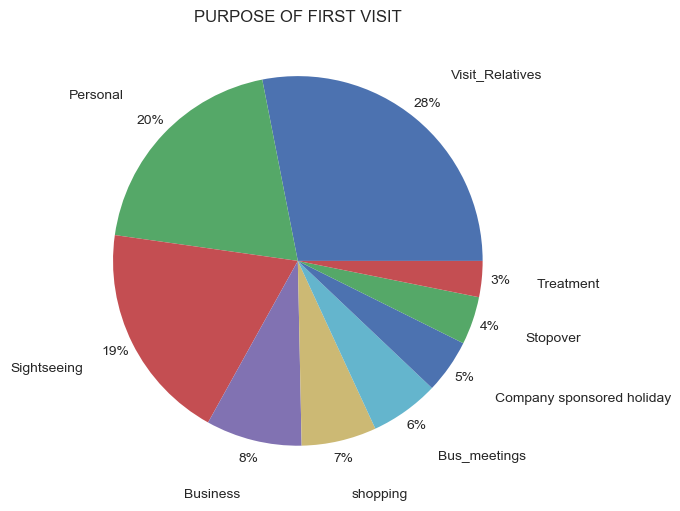

In [16]:
x = pd.DataFrame(df[df['1st_visit']=='Yes']['Purpose'].value_counts()[1:10]).rename(index=d).index.tolist()
y = pd.DataFrame(df[df['1st_visit']=='Yes']['Purpose'].value_counts()[1:10])['Purpose'].tolist()

plt.figure(figsize=(15,6))
plt.style.use('seaborn')
plt.rc('font', size=10)
plt.pie(y,autopct='%1.0f%%', labels =x, pctdistance=1.1, labeldistance=1.3)
plt.title('PURPOSE OF FIRST VISIT')
plt.show()

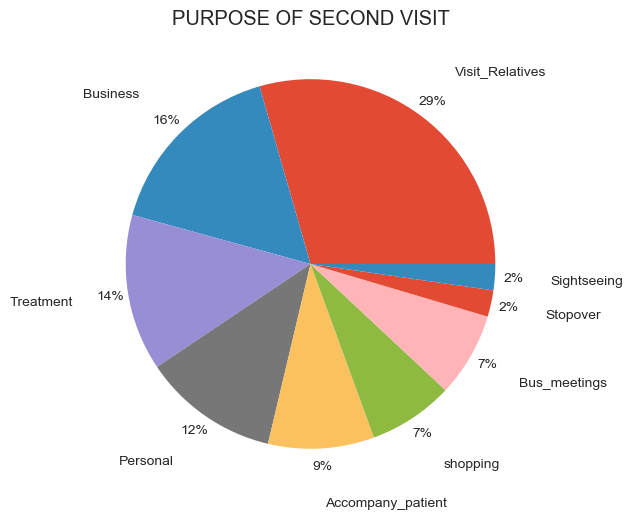

In [17]:
x = pd.DataFrame(df[df['1st_visit']=='No']['Purpose'].value_counts()[1:10]).rename(index=d).index.tolist()
y = pd.DataFrame(df[df['1st_visit']=='No']['Purpose'].value_counts()[1:10])['Purpose'].tolist()

plt.figure(figsize=(15,6))
plt.style.use('ggplot')
plt.rc('font', size=10)
plt.pie(y,autopct='%1.0f%%', labels =x, pctdistance=1.1, labeldistance=1.3)
plt.title('PURPOSE OF SECOND VISIT')
plt.show()

## LANGUAGE OF VISITORS

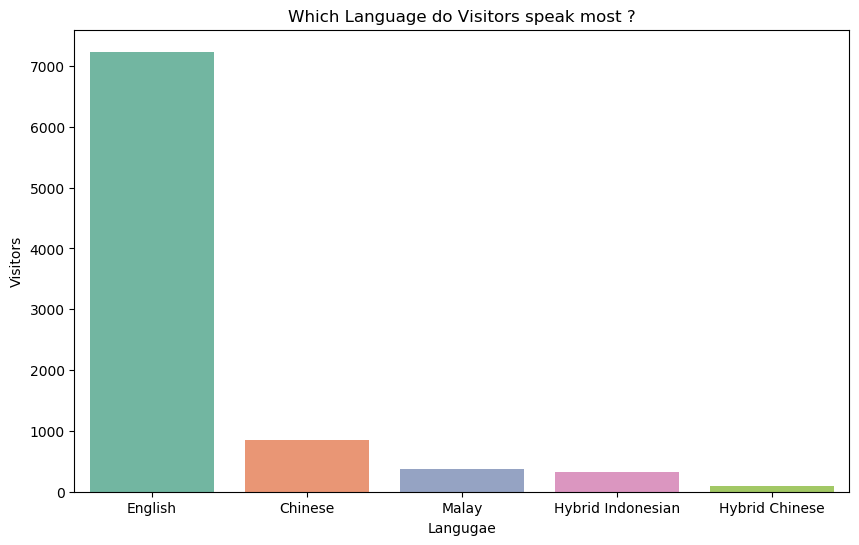

In [18]:
x = pd.DataFrame(df['langint'].value_counts()[:5]).index.tolist()
y = pd.DataFrame(df['langint'].value_counts()[:5])['langint'].tolist()

plt.figure(figsize=(10,6))
plt.style.use('default')
plt.rc('font', size=10)
sns.barplot(x=x, y=y, palette='Set2')
plt.xlabel('Langugae')
plt.ylabel('Visitors')
plt.title('Which Language do Visitors speak most ?')
plt.show()

## Do people come again after their first visit ?

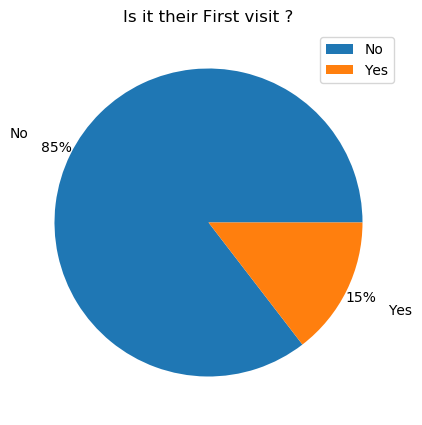

In [19]:
c = pd.DataFrame(df['1st_visit'].value_counts())
m = c.index
count = c['1st_visit']

plt.style.use('default')
plt.figure(figsize=(5,5))
plt.pie(count, autopct='%1.0f%%', labels =m, pctdistance=1.1, labeldistance=1.3)
plt.legend(m, loc='upper right')
plt.title('Is it their First visit ?')
plt.show()

- From the figures, it is quite obvious that most of the people come again after their first visit. 85% of the people who has already visited come again to visit.

## NO OF DAYS THE VISITORS STAYED

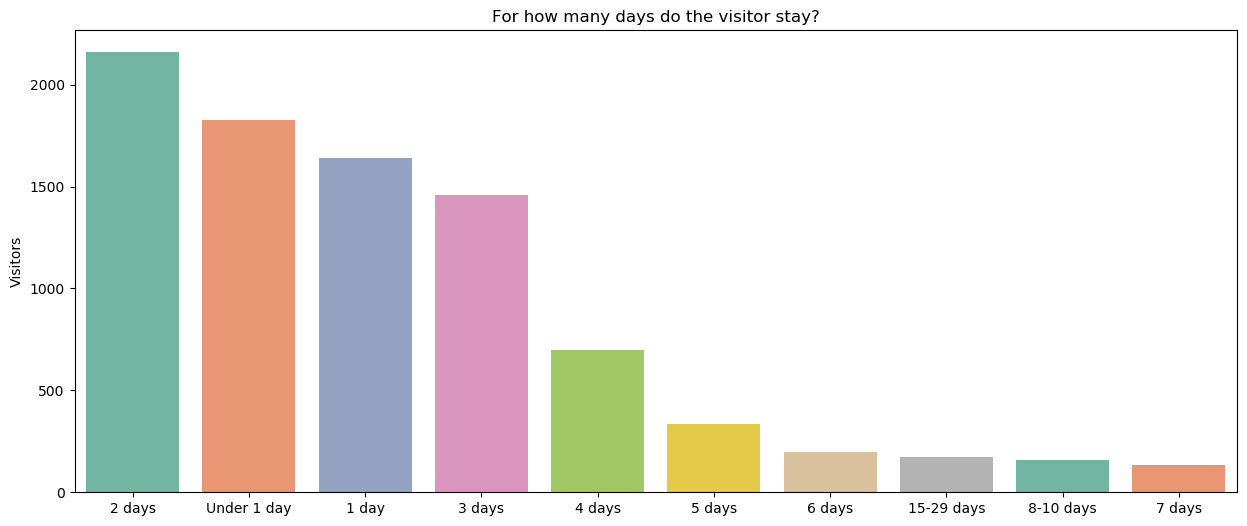

In [20]:
x = pd.DataFrame(df['length_stay'].value_counts()[:10]).index.tolist()
y = pd.DataFrame(df['length_stay'].value_counts()[:10])['length_stay'].tolist()

plt.figure(figsize=(15,6))
plt.rc('font', size=10)
sns.barplot(x=x, y=y, palette='Set2')
plt.xlabel('')
plt.ylabel('Visitors')
plt.title('For how many days do the visitor stay?')
plt.show()


## LENGTH OF DAYS FIRST TIME STAYED

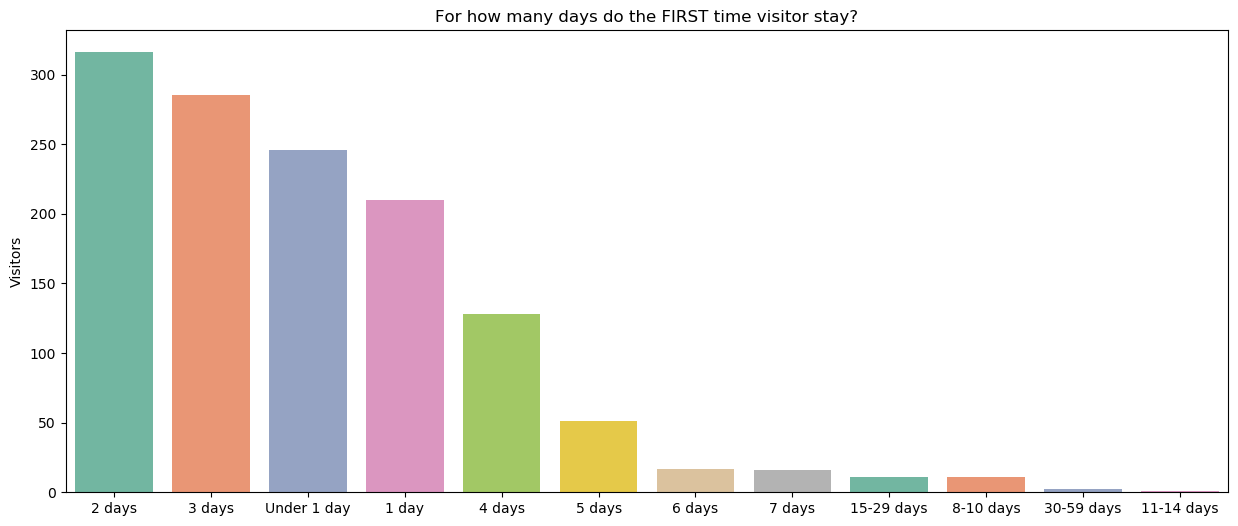

In [21]:
x = pd.DataFrame(df[df['1st_visit']=='Yes']['length_stay'].value_counts()).index.tolist()
y = pd.DataFrame(df[df['1st_visit']=='Yes']['length_stay'].value_counts())['length_stay'].tolist()

plt.figure(figsize=(15,6))
plt.rc('font', size=10)
sns.barplot(x=x, y=y, palette='Set2')
plt.ylabel('Visitors')
plt.title('For how many days do the FIRST time visitor stay?')
plt.show()

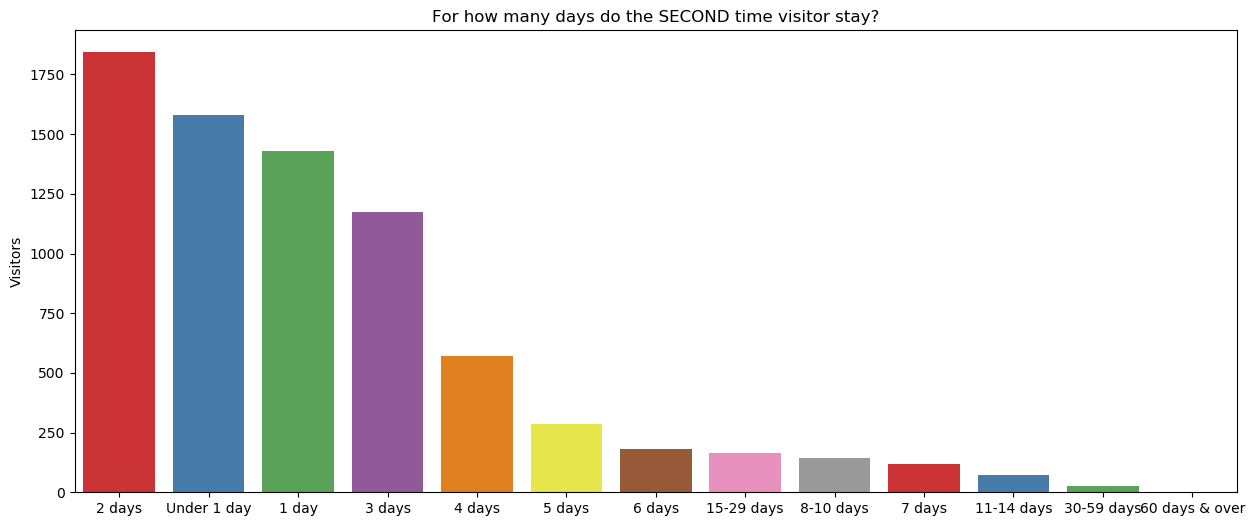

In [22]:
x = pd.DataFrame(df[df['1st_visit']=='No']['length_stay'].value_counts()).index.tolist()
y = pd.DataFrame(df[df['1st_visit']=='No']['length_stay'].value_counts())['length_stay'].tolist()

plt.figure(figsize=(15,6))
plt.rc('font', size=10)
sns.barplot(x=x, y=y, palette='Set1')
plt.ylabel('Visitors')
plt.title('For how many days do the SECOND time visitor stay?')
plt.show()

## GENDER RATIO OF THE VISITORS

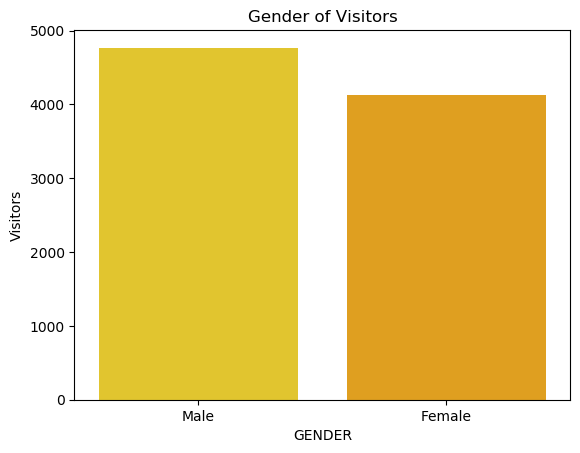

In [23]:
sns.countplot(df['f1_gender'], palette='Wistia')
plt.xlabel('GENDER')
plt.ylabel('Visitors')
plt.title('Gender of Visitors')
plt.show()

## What kind of travel type do people come with 1st visit and 2nd visit ?

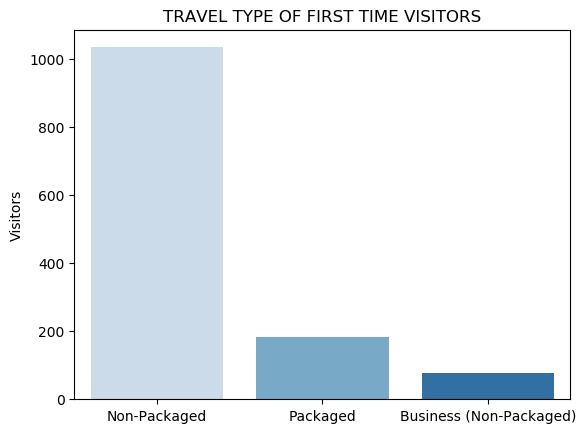

In [24]:
x = pd.DataFrame(df[df['1st_visit']=='Yes']['travel_type'].value_counts()).index.tolist()
y = pd.DataFrame(df[df['1st_visit']=='Yes']['travel_type'].value_counts())['travel_type'].tolist()

# plt.figure(figsize=(15,6))
plt.rc('font', size=10)
sns.barplot(x=x, y=y, palette='Blues')
# plt.xlabel('')
plt.ylabel('Visitors')
plt.title('TRAVEL TYPE OF FIRST TIME VISITORS')
plt.show()

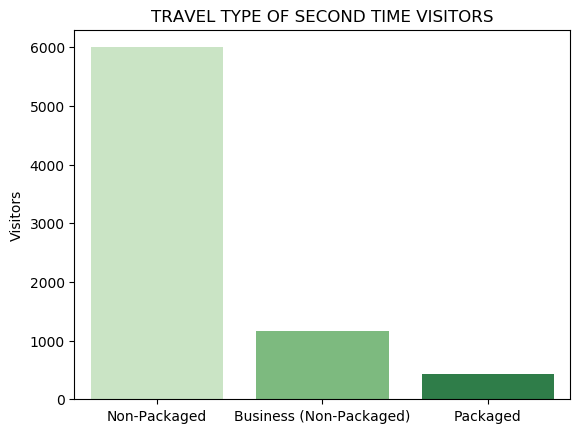

In [25]:
x = pd.DataFrame(df[df['1st_visit']=='No']['travel_type'].value_counts()).index.tolist()
y = pd.DataFrame(df[df['1st_visit']=='No']['travel_type'].value_counts())['travel_type'].tolist()

# plt.figure(figsize=(15,6))
plt.rc('font', size=10)
sns.barplot(x=x, y=y, palette='Greens')
# plt.xlabel('')
plt.ylabel('Visitors')
plt.title('TRAVEL TYPE OF SECOND TIME VISITORS')
plt.show()

## Which Profession Visits most ?

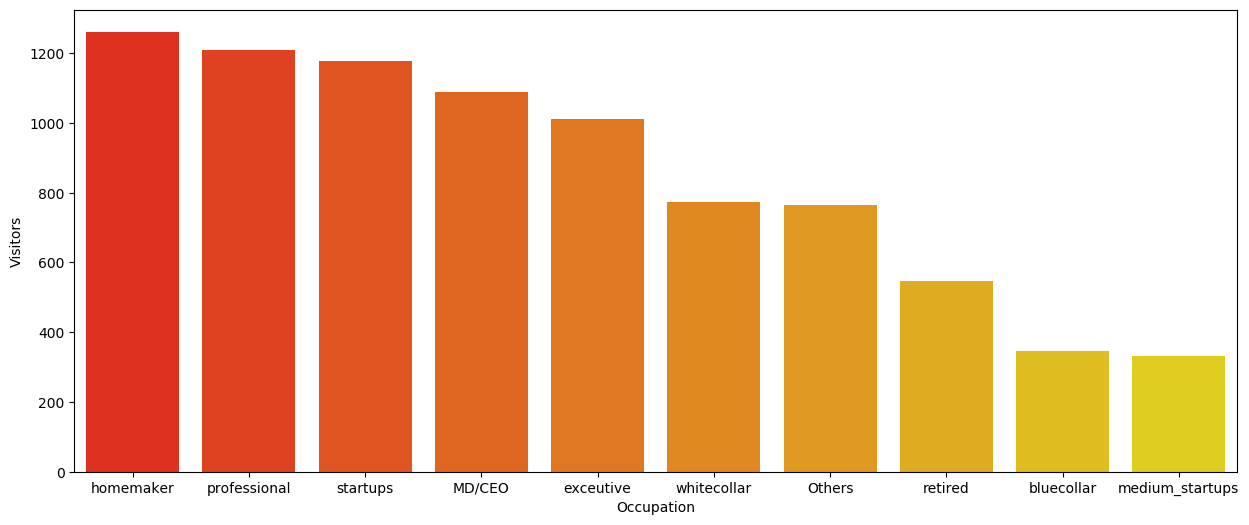

In [27]:
ind_list = ['homemaker','professional','startups','MD/CEO','exceutive','whitecollar','Others','retired','bluecollar','medium_startups','large_startups']
d = dict()
for i, ind in enumerate(pd.DataFrame(df['f3_occupation'].value_counts()[:10]).index.tolist()):
    d[ind] = ind_list[i]
x = pd.DataFrame(df['f3_occupation'].value_counts()[:10]).rename(index=d).index.tolist()
y = pd.DataFrame(df['f3_occupation'].value_counts()[:10])['f3_occupation'].tolist()

plt.figure(figsize=(15,6))
plt.rc('font', size=10)
sns.barplot(x=x, y=y, palette='autumn')
plt.xlabel('Occupation')
plt.ylabel('Visitors')
plt.show()

## Which Profession travels the SECOND TIME most ?

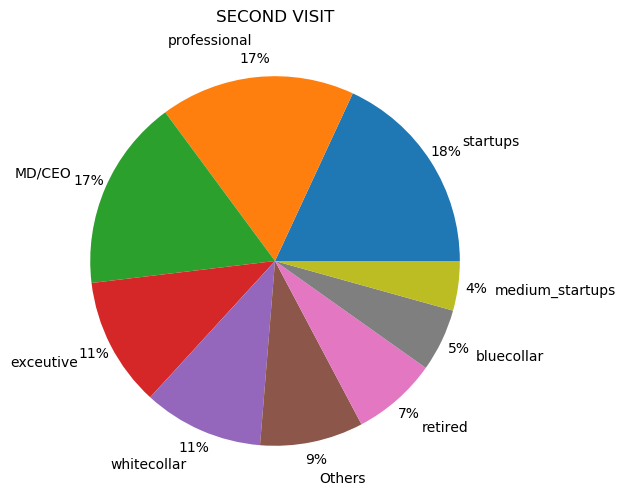

In [28]:
x = pd.DataFrame(df[df['1st_visit']=='No']['f3_occupation'].value_counts()[1:10]).rename(index=d).index.tolist()
y = pd.DataFrame(df[df['1st_visit']=='No']['f3_occupation'].value_counts()[1:10])['f3_occupation'].tolist()

plt.figure(figsize=(15,6))
plt.rc('font', size=10)
plt.pie(y, autopct='%1.0f%%', labels =x, pctdistance=1.1, labeldistance=1.2)
# sns.barplot(x=x, y=y, palette='Set2')

# plt.xlabel('Profession')
# plt.ylabel('Visitors')
plt.title('SECOND VISIT')
plt.show()

- 18% of the startups owner visits Singapore second time followed by 17 % of the professionals (Teacher, lawyer etc.), Managing Directors/ CEO etc. Most of the people who visits for the second time come for Business purposes.

## SHOPPING AND EXPENDITURE COST

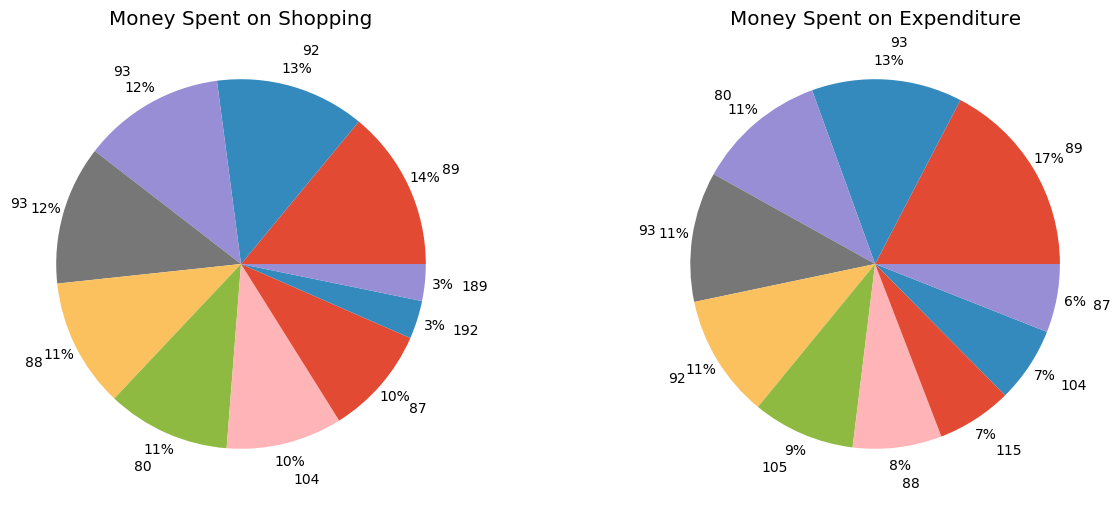

In [29]:
items= [ 'totshopping_$', 'totexp_$']

titles = ['Shopping','Expenditure']
plt.figure(figsize=(15,6))
plt.style.use('ggplot')
for i in range(len(items)):
    plt.subplot(1, 2, i+1)
    thing = pd.DataFrame(df[items[i]].value_counts().sort_values(ascending=False)).reset_index()[0:10]
    money = thing['index'].astype(int)
    count = thing[items[i]]
    plt.pie(count, autopct='%1.0f%%', labels =money, pctdistance=1.1, labeldistance=1.2)
    plt.title('Money Spent on {}'.format(titles[i]))
plt.show()

--> On Average, how much visitors spend on Shopping ?

- More than 50 % of visitors spend money in the range of  80−93 on Shopping.


- Maximum amount spent is $ 25,789,993.32 on shopping

- Minimum amount spent is $ 80 dollars.

--> On Average, how much visitors spend on Food ?

- Most of the visitors spend money in the range of  10−200 on Food.

- Maximum amount spent is $ 2150

- Minimum amount spent is $ 0.

## MONEY SPENT ON OTHER THINGS

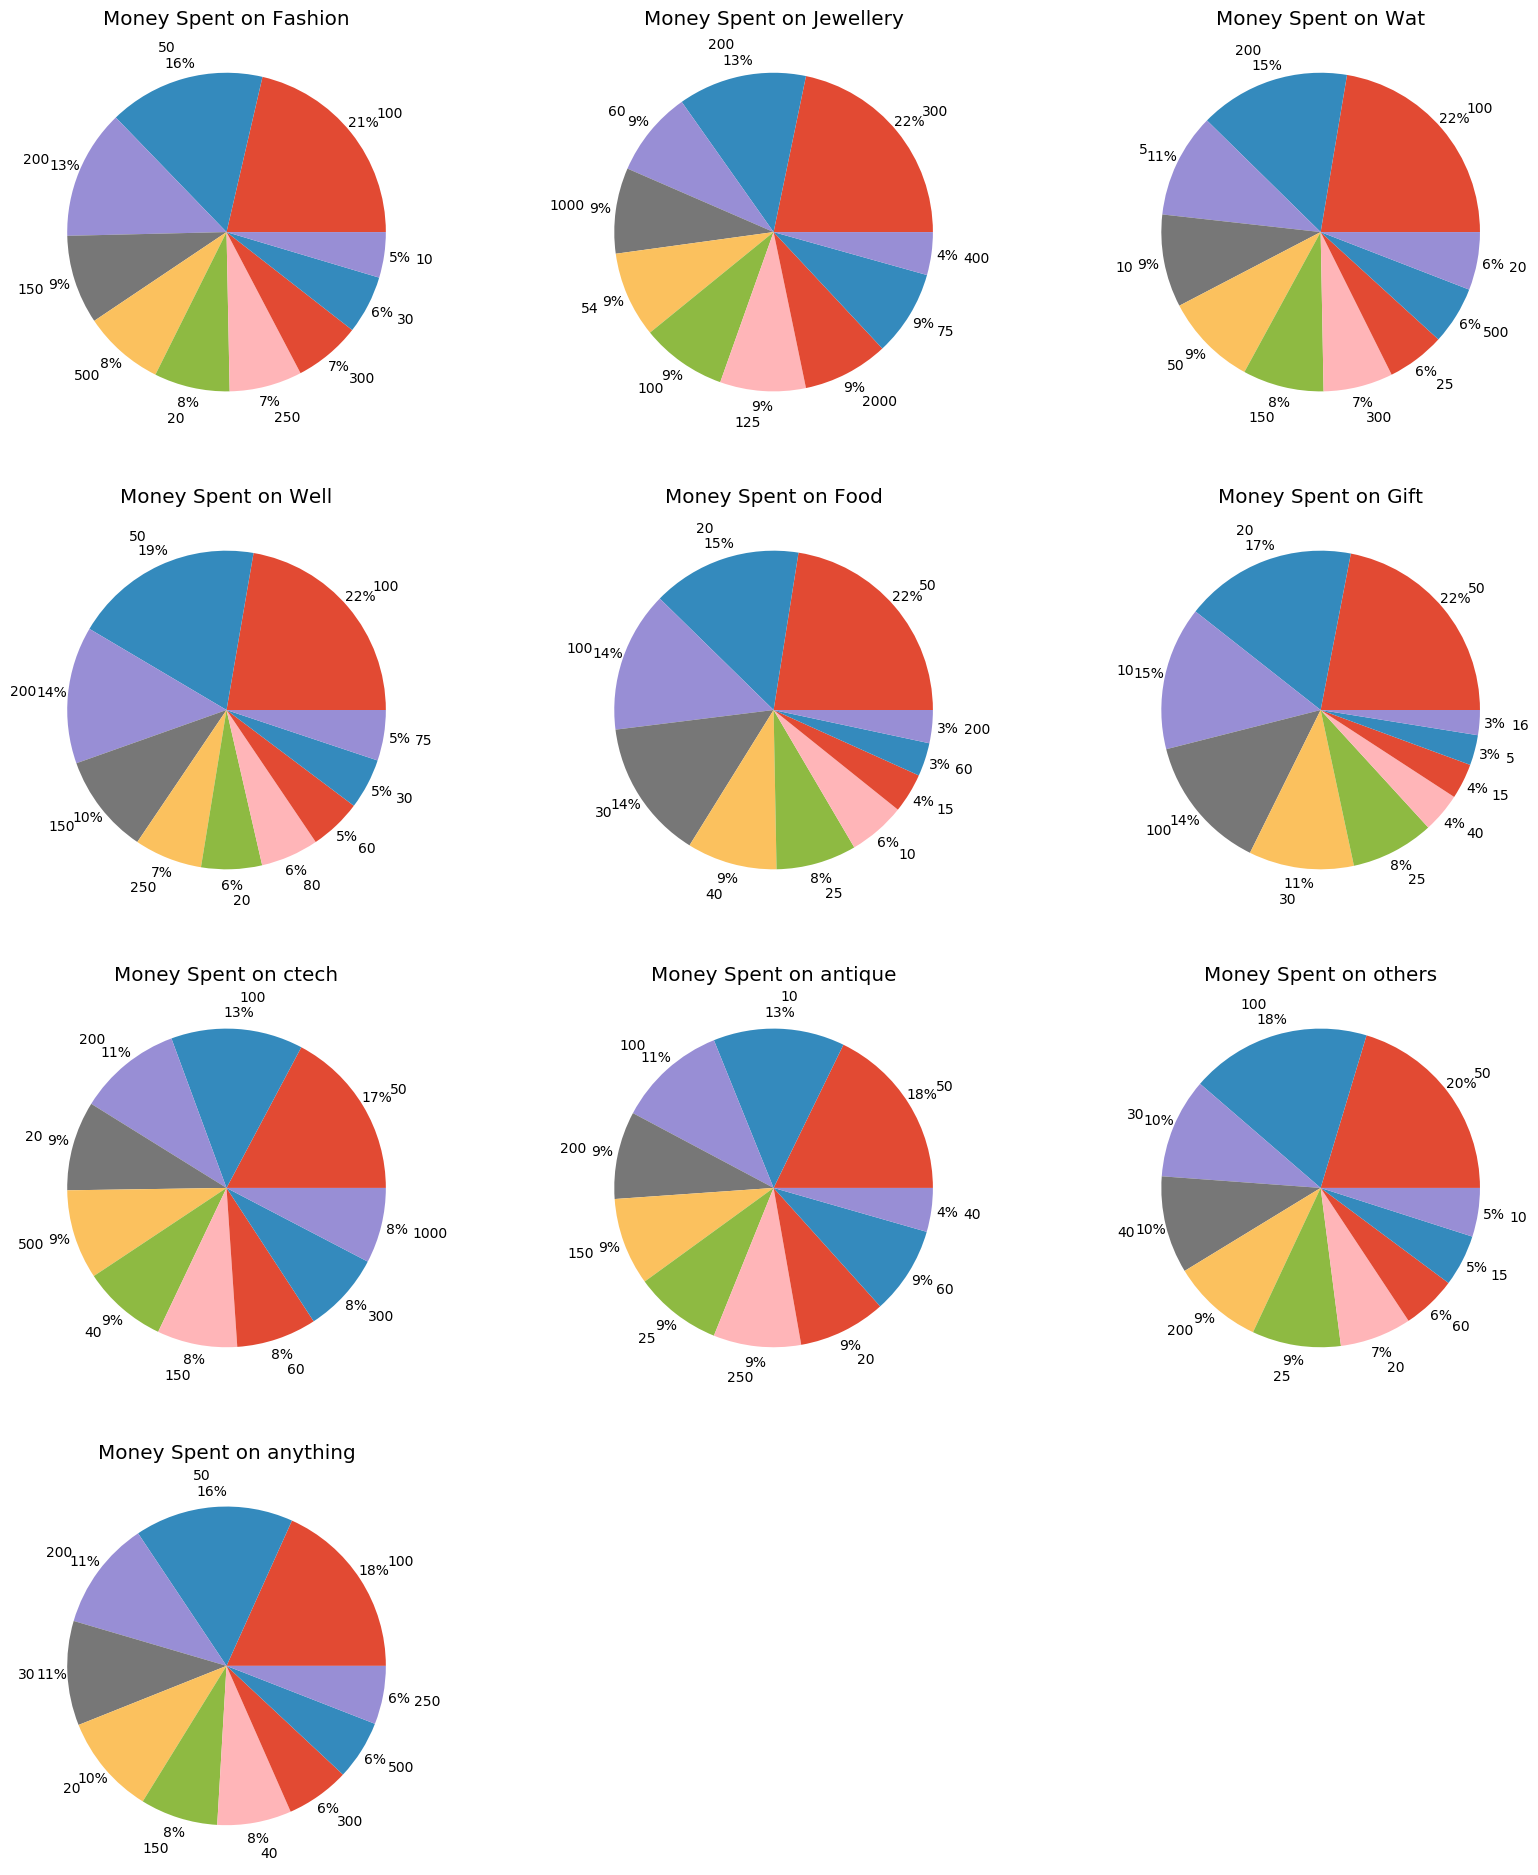

In [31]:
items= ['shop_$fash',
       'shop_$jew', 'shop_$wat', 'shop_$well', 'shop_$food', 'shop_$gift',
       'shop_$ctec', 'shop_$anti', 'shop_$oth', 'shop_$any']

titles = ['Fashion','Jewellery','Wat','Well','Food','Gift','ctech','antique','others','anything']
plt.figure(figsize=(20,30))

for i in range(len(items)):
    plt.subplot(5, 3, i+1)
    thing = pd.DataFrame(df[items[i]].value_counts().sort_values(ascending=False)).reset_index()[1:11]
    money = thing['index'].astype(int)
    count = thing[items[i]]
    plt.pie(count, autopct='%1.0f%%', labels =money, pctdistance=1.1, labeldistance=1.2)
    plt.title('Money Spent on {}'.format(titles[i]))
plt.show()

- On Average, how much visitors spend on Jewellery?

Most of the visitors spend money in the range of  50−2000 on Jewellery.

Maximum amount spent is $ 10,000 on Jewellery.

Minimum amount spent is $ 0.

- On Average, how much visitors spend on Gifts?

Most of the visitors spend money in the range of  5−100 on Gifts.

Maximum amount spent is $ 1375 on Gifts.

Minimum amount spent is $ 0.

- On Average, how much visitors spend on Fashion ?
Most of the visitors spend money in the range of  10−500 on Fashion (clothings ).

Maximum amount spent is $ 15000 on Fashion.

Minimum amount spent is $ 0.

- On Average, how much visitors spend on buying Antiques ?

Most of the visitors spend money in the range of  10−250 in buying Antiques.

Maximum amount spent is $ 10000.

Minimum amount spent is $ 0

- Total expenditure of visitors

Most of the visitors spend money in range  80−115 dollars

Maximum amount spent is $ 25,795,239.39 on total expenses.

Minimum amount spent is $ 80 dollars.

Maximum amount spent during the visit is $ 25,795,239 by Managing Director (CEO / Company director )

Minimum amount spent on vacation is $ 80 by many homemakers, professionals, bluecollars etc

## PREFERRED HOTELS

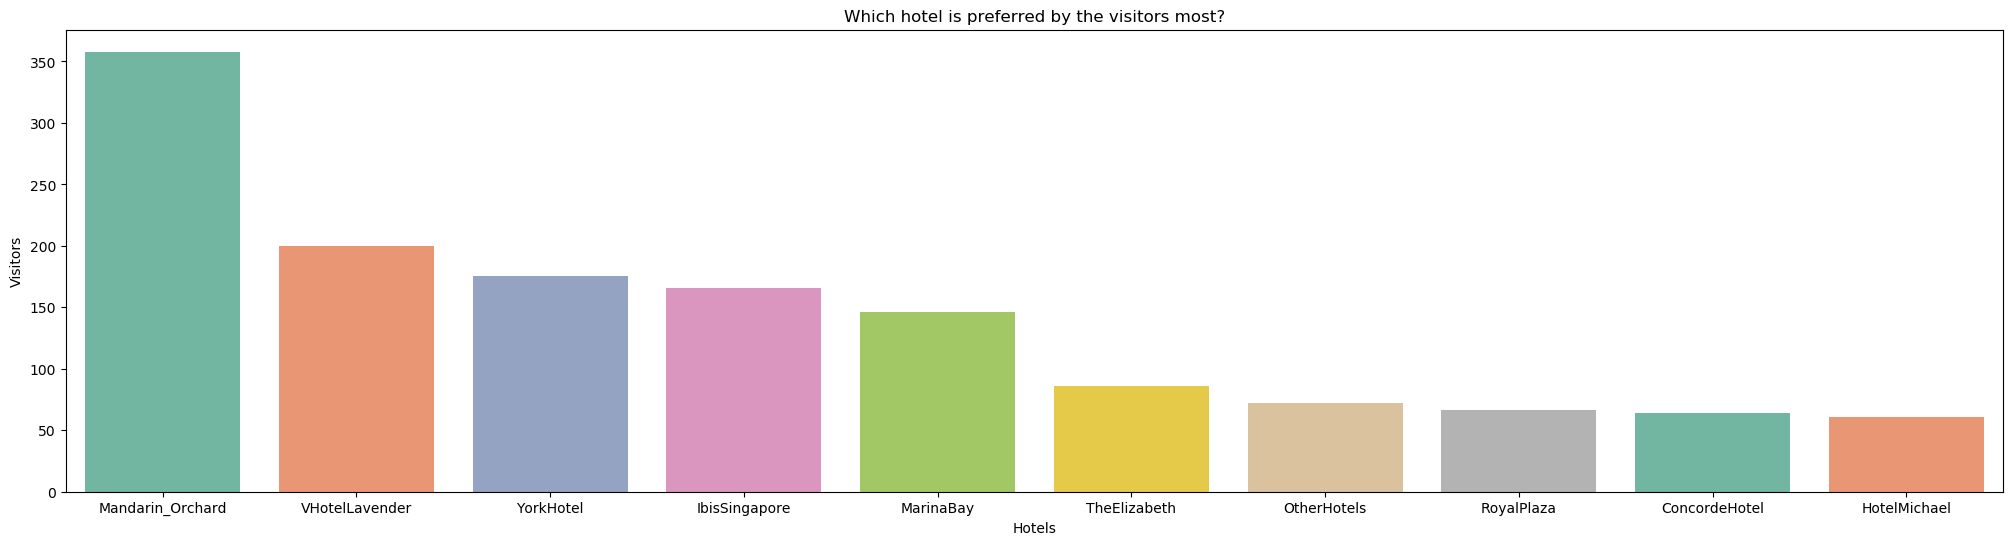

In [32]:
ind_list = ['Mandarin_Orchard','VHotelLavender','YorkHotel','IbisSingapore',
            'MarinaBay','TheElizabeth','OtherHotels','RoyalPlaza','ConcordeHotel','HotelMichael']
d = dict()
for i, ind in enumerate(pd.DataFrame(df['MainHotel'].value_counts()[:10]).index.tolist()):
    d[ind] = ind_list[i]

x = pd.DataFrame(df['MainHotel'].value_counts()[:10]).rename(index=d).index.tolist()
y = pd.DataFrame(df['MainHotel'].value_counts()[:10])['MainHotel'].tolist()

plt.style.use('default')
plt.figure(figsize=(25,6))
plt.rc('font', size=10)
sns.barplot(x=x, y=y, palette='Set2')
plt.xlabel('Hotels')
plt.ylabel('Visitors')
plt.title('Which hotel is preferred by the visitors most?')
plt.show()

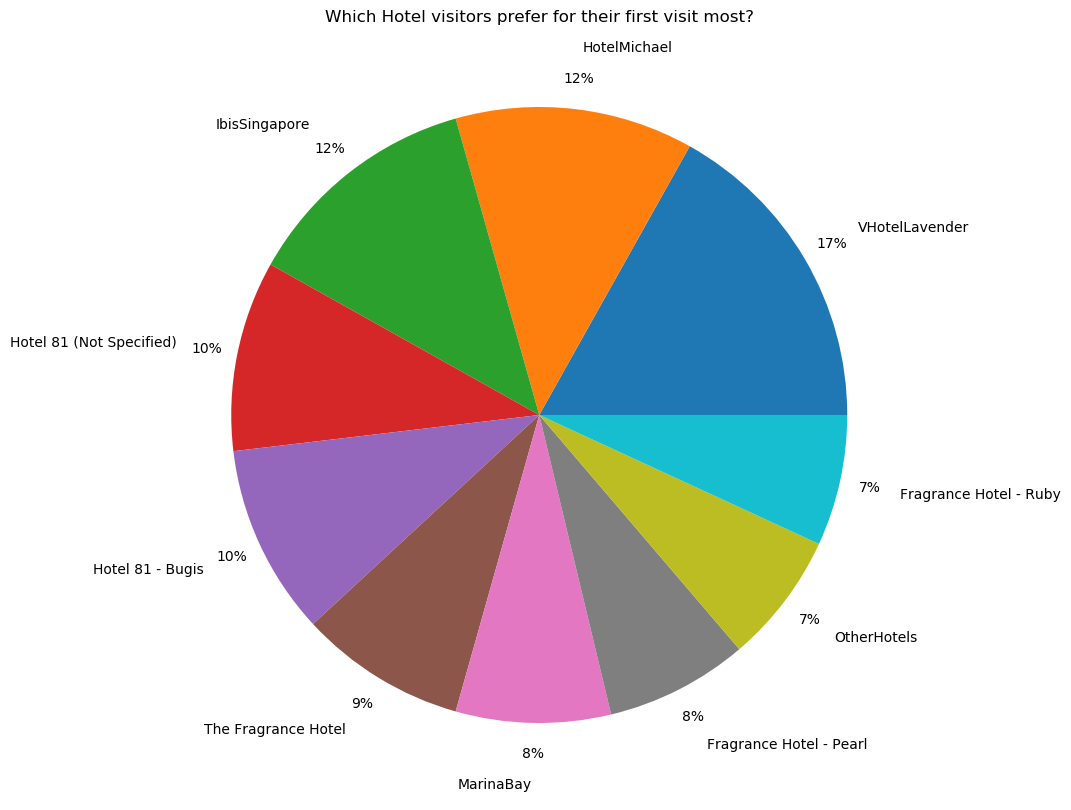

In [33]:
x = pd.DataFrame(df[df['1st_visit']=='Yes']['MainHotel'].value_counts()[:10]).rename(index=d).index.tolist()
y = pd.DataFrame(df[df['1st_visit']=='Yes']['MainHotel'].value_counts()[:10])['MainHotel'].tolist()

plt.figure(figsize=(15,10))
# plt.rc('font', size=12)
plt.pie(y, autopct='%1.0f%%', labels = x, pctdistance=1.1, labeldistance=1.2)
plt.title('Which Hotel visitors prefer for their first visit most?')
plt.show()

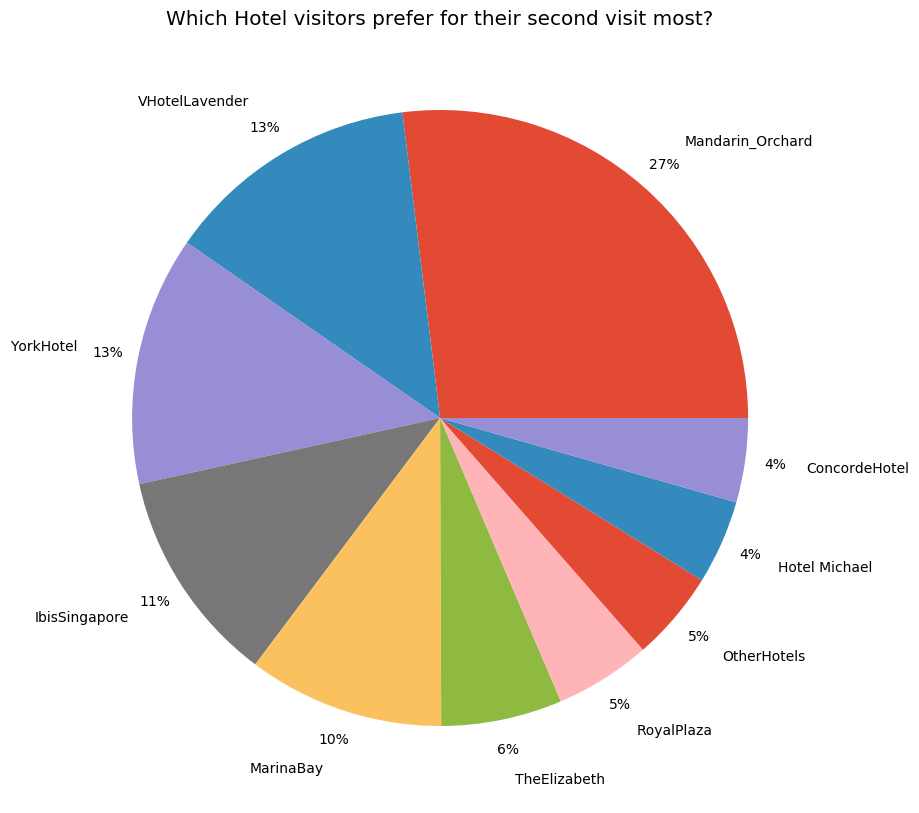

In [34]:
x = pd.DataFrame(df[df['1st_visit']=='No']['MainHotel'].value_counts()[:10]).rename(index=d).index.tolist()
y = pd.DataFrame(df[df['1st_visit']=='No']['MainHotel'].value_counts()[:10])['MainHotel'].tolist()

plt.figure(figsize=(15,10))
# plt.rc('font', size=12)
plt.style.use('ggplot')
plt.pie(y, autopct='%1.0f%%', labels = x, pctdistance=1.1, labeldistance=1.2)
plt.title('Which Hotel visitors prefer for their second visit most?')
plt.show()

- 27 % visitors prefer Mandarin Orchard, 13 % V Hotel lavender, 13 % York Hotel, 11 % Ibis Singapore, 10% Marina bay and so on

## Hotels Preferred By the Homemakers in their FIRST VISIT

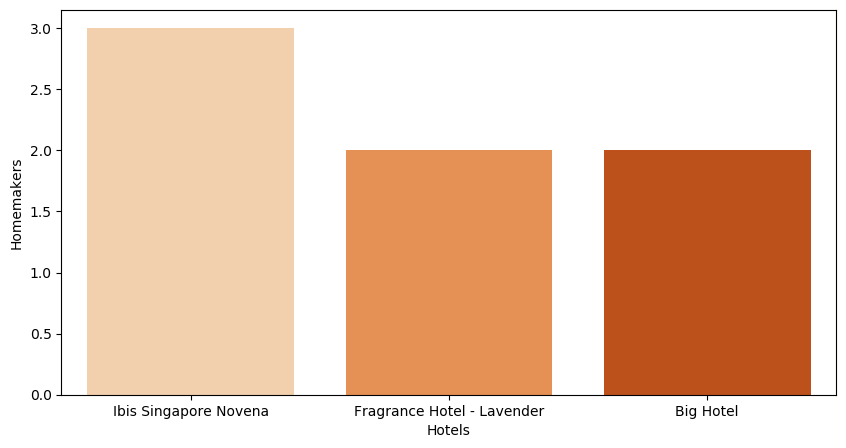

In [38]:
x = pd.DataFrame(df[ (df['1st_visit']=='Yes') & (df['f3_occupation']== 'Homemaker (Full time)') ]['MainHotel'].value_counts()[:3]).rename(index=d).index.tolist()
y = pd.DataFrame(df[(df['1st_visit']=='Yes') & (df['f3_occupation']== 'Homemaker (Full time)') ]['MainHotel'].value_counts()[:3])['MainHotel'].tolist()

plt.figure(figsize=(10,5))
plt.style.use('default')
plt.rc('font', size=10)
sns.barplot(x=x, y=y, palette='Oranges')
plt.xlabel('Hotels')
plt.ylabel('Homemakers')
plt.title('')
plt.show()

## Hotels Preferred By the Homemakers in their SECOND VISIT

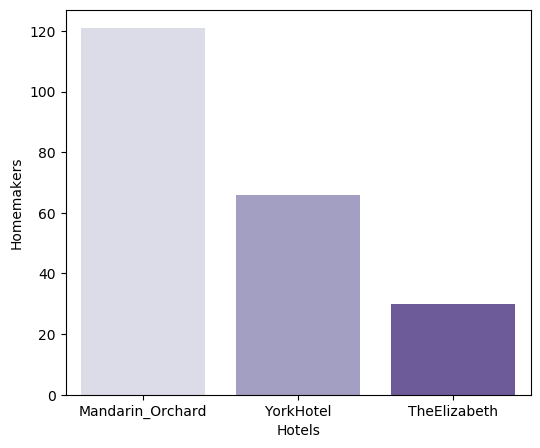

In [39]:
x = pd.DataFrame(df[ (df['1st_visit']=='No') & (df['f3_occupation']== 'Homemaker (Full time)') ]['MainHotel'].value_counts()[:3]).rename(index=d).index.tolist()
y = pd.DataFrame(df[(df['1st_visit']=='No') & (df['f3_occupation']== 'Homemaker (Full time)') ]['MainHotel'].value_counts()[:3])['MainHotel'].tolist()

plt.figure(figsize=(6,5))
plt.style.use('default')
plt.rc('font', size=10)
sns.barplot(x=x, y=y, palette='Purples')
plt.xlabel('Hotels')
plt.ylabel('Homemakers')
plt.title('')
plt.show()

## Hotels Preferred By the Businessmen in their FIRST VISIT

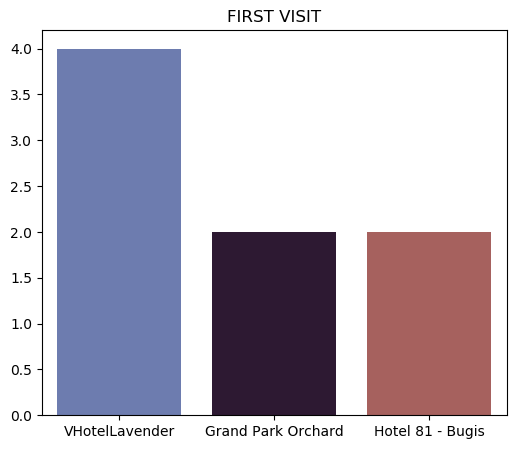

In [41]:
x = pd.DataFrame(df[ (df['1st_visit']=='Yes') & (df['f3_occupation']== 'Businessman (small company, <50 people)') ]['MainHotel'].value_counts()[:3]).rename(index=d).index.tolist()
y = pd.DataFrame(df[(df['1st_visit']=='Yes') & (df['f3_occupation']== 'Businessman (small company, <50 people)') ]['MainHotel'].value_counts()[:3])['MainHotel'].tolist()

plt.figure(figsize=(6,5))
plt.style.use('default')
plt.rc('font', size=10)
sns.barplot(x=x, y=y, palette='twilight')
plt.title('FIRST VISIT')
plt.show()

## Hotels Preferred By the Businessmen in their SECOND VISIT

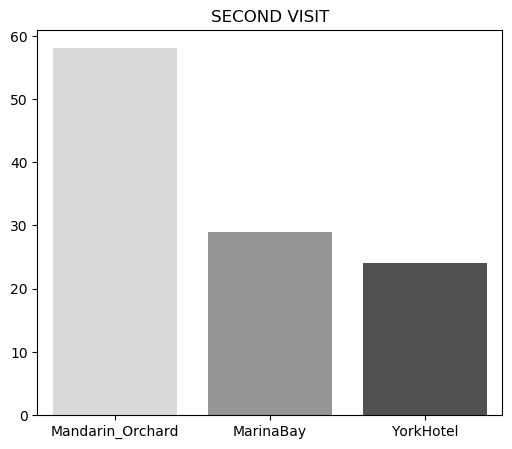

In [42]:
x = pd.DataFrame(df[ (df['1st_visit']=='No') & (df['f3_occupation']== 'Businessman (small company, <50 people)') ]['MainHotel'].value_counts()[:3]).rename(index=d).index.tolist()
y = pd.DataFrame(df[(df['1st_visit']=='No') & (df['f3_occupation']== 'Businessman (small company, <50 people)') ]['MainHotel'].value_counts()[:3])['MainHotel'].tolist()

plt.figure(figsize=(6,5))
plt.style.use('default')
plt.rc('font', size=10)
sns.barplot(x=x, y=y, palette='Greys')
plt.title('SECOND VISIT')
plt.show()

In general, 26% visitors prefer hotel Mandarin Orchard, 14% prefer V HotelLavender and 13% York Hotel.

first time visitors preference : 17% V hotel lavender, 12% Ibis Singapore, 12% Fragrance Hotel Bugis and rest others.

SECOND TIME visitors preference : same as in general.

That clearly shows, hotel Mandarin Orchard , V Hotel Lavender and York Hotel are good hotels in which visitors loved to stay.

Most of the visitors are Homemakers, let us see what’s their preferred hotels

First time homemaker visitors prefer Ibis Singapore, Orchid Hotel and Big Hotel.

During their second time, they prefer Mandarin orchard, York Hotel and the Elizabeth.

## VISITORS FAVORITE COMPANION

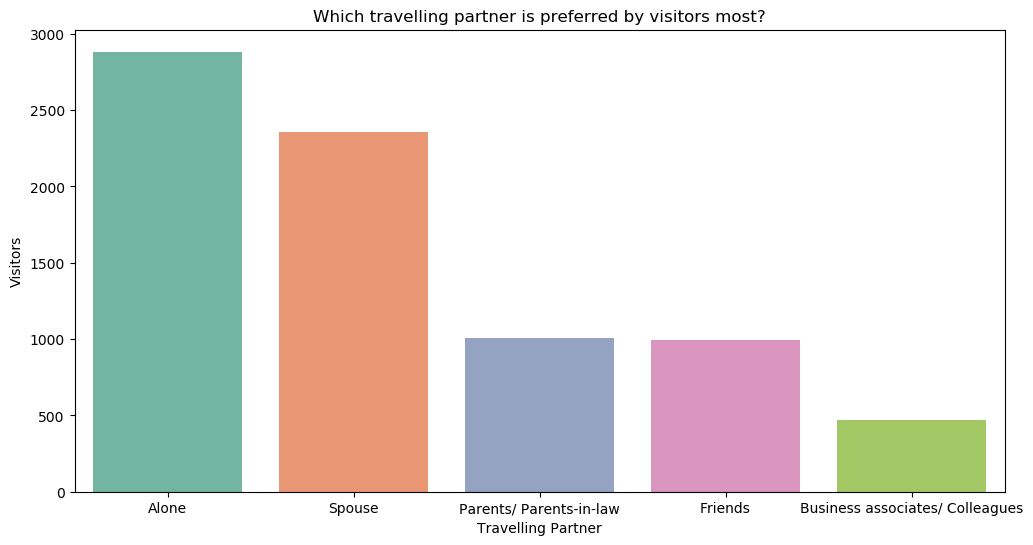

In [43]:
x = pd.DataFrame(df['travel_companion.1'].value_counts()[:5]).index.tolist()
y = pd.DataFrame(df['travel_companion.1'].value_counts()[:5])['travel_companion.1'].tolist()

plt.figure(figsize=(12,6))
plt.rc('font', size=10)
sns.barplot(x=x, y=y, palette='Set2')
plt.xlabel('Travelling Partner')
plt.ylabel('Visitors')
plt.title('Which travelling partner is preferred by visitors most?')
plt.show()

- Most of the people preferred to travel alone or with their spouse followed by parents, friends and colleagues.

## First Visit Travelling Partners

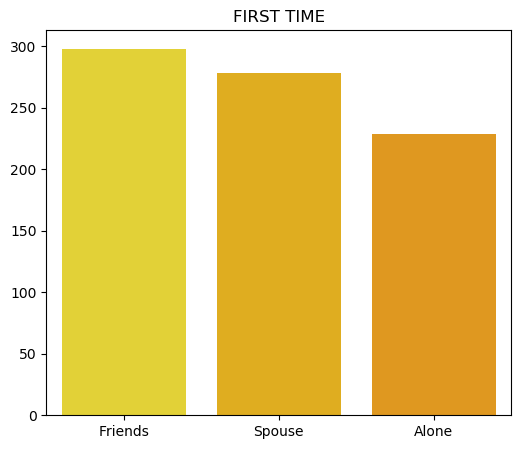

In [44]:
x = pd.DataFrame(df[df['1st_visit']=='Yes' ]['travel_companion.1'].value_counts()[:3]).rename(index=d).index.tolist()
y = pd.DataFrame(df [df['1st_visit']=='Yes' ]['travel_companion.1'].value_counts()[:3])['travel_companion.1'].tolist()

plt.figure(figsize=(6,5))
plt.rc('font', size=10)
sns.barplot(x=x, y=y, palette='Wistia')
# plt.xlabel('partners')
# plt.ylabel('Visitors')
plt.title('FIRST TIME')
plt.show()

## Second Visit Travelling Partners

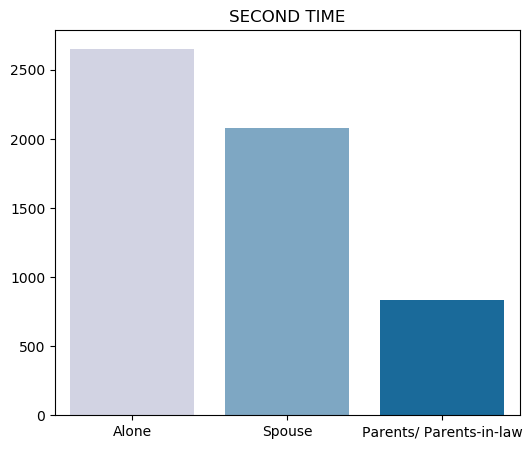

In [45]:
x = pd.DataFrame(df[df['1st_visit']=='No' ]['travel_companion.1'].value_counts()[:3]).rename(index=d).index.tolist()
y = pd.DataFrame(df [df['1st_visit']=='No' ]['travel_companion.1'].value_counts()[:3])['travel_companion.1'].tolist()

plt.figure(figsize=(6,5))
plt.rc('font', size=10)
sns.barplot(x=x, y=y, palette='PuBu')
# plt.xlabel('partners')
# plt.ylabel('Visitors')
plt.title('SECOND TIME')
plt.show()

## Which travelling partner preferred by the students ?

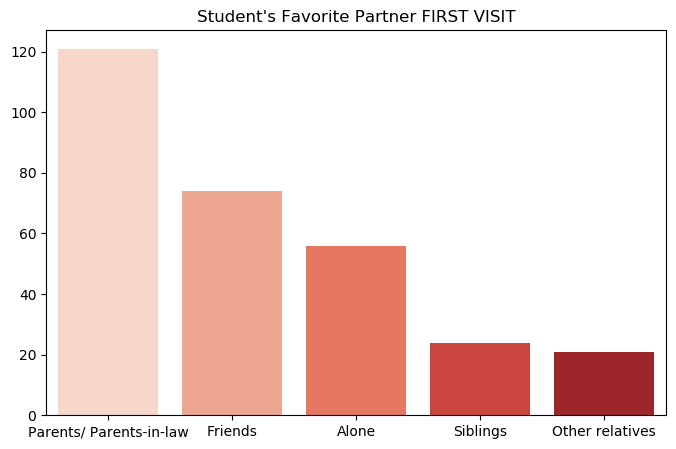

In [46]:
x = pd.DataFrame(df[ (df['1st_visit']=='Yes') & (df['f3_occupation']== 'Student') ]['travel_companion.1'].value_counts()[:5]).rename(index=d).index.tolist()
y = pd.DataFrame(df[(df['1st_visit']=='Yes') & (df['f3_occupation']== 'Student') ]['travel_companion.1'].value_counts()[:5])['travel_companion.1'].tolist()

plt.figure(figsize=(8,5))
plt.rc('font', size=10)
sns.barplot(x=x, y=y, palette='Reds')
# plt.xlabel('Travelling Partners')
# plt.ylabel('Students')
plt.title("Student's Favorite Partner FIRST VISIT")
plt.show()

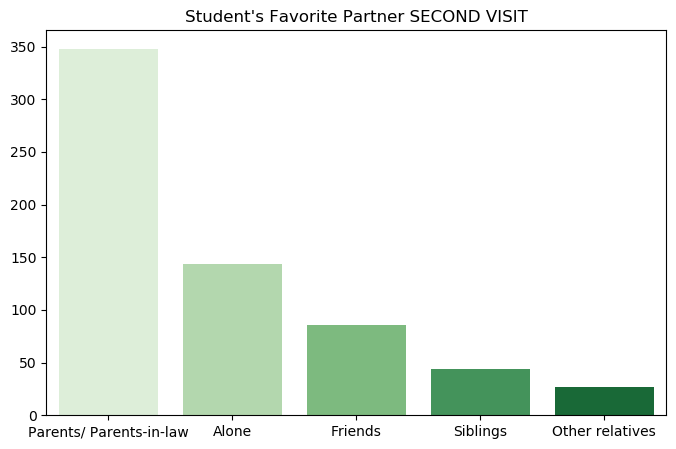

In [47]:
x = pd.DataFrame(df[ (df['1st_visit']=='No') & (df['f3_occupation']== 'Student') ]['travel_companion.1'].value_counts()[:5]).rename(index=d).index.tolist()
y = pd.DataFrame(df[(df['1st_visit']=='No') & (df['f3_occupation']== 'Student') ]['travel_companion.1'].value_counts()[:5])['travel_companion.1'].tolist()

plt.figure(figsize=(8,5))
plt.rc('font', size=10)
sns.barplot(x=x, y=y, palette='Greens')
# plt.xlabel('Travelling Partners')
# plt.ylabel('Students')
plt.title("Student's Favorite Partner SECOND VISIT")
plt.show()

## TOP 10 PEOPLE WHO SPENT A LOT

In [48]:
for i in df['totexp_$'].sort_values(ascending=False).head(10):
    print(df[df['totexp_$'] == i]['f3_occupation'])
    print(df[df['totexp_$'] == i]['travel_companion.1'])
    print(df[df['totexp_$'] == i]['f1_gender'])
    print(df[df['totexp_$'] == i]['City_residence'])
    print(df[df['totexp_$'] == i]['f4_industry'])
    print(df[df['totexp_$'] == i]['1st_visit'])
    print()

7003    Mager (CEO, company director, senior mager)
Name: f3_occupation, dtype: object
7003    Alone
Name: travel_companion.1, dtype: object
7003    Male
Name: f1_gender, dtype: object
7003    Batam
Name: City_residence, dtype: object
7003    Others (specify)
Name: f4_industry, dtype: object
7003    No
Name: 1st_visit, dtype: object

6844    Businessman (small company, <50 people)
Name: f3_occupation, dtype: object
6844    Spouse
Name: travel_companion.1, dtype: object
6844    Male
Name: f1_gender, dtype: object
6844    Yogyakarta
Name: City_residence, dtype: object
6844    Wholesale and Retail Trade
Name: f4_industry, dtype: object
6844    No
Name: 1st_visit, dtype: object

5434    Businessman (small company, <50 people)
Name: f3_occupation, dtype: object
5434    Parents/ Parents-in-law
Name: travel_companion.1, dtype: object
5434    Male
Name: f1_gender, dtype: object
5434    Yogyakarta
Name: City_residence, dtype: object
5434    Electronics & Precision Engineering
Name: f4_industry,